## Download Dataset

In [ ]:
# %matplotlib inline
import wget
import pandas as pd
from tqdm import tqdm
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Look through data a bit

In [6]:
# Charger les données 2024
df_2024 = pd.read_csv('../data/atp_matches_2024.csv')

# Aperçu des 5 premières lignes
print("\nAperçu des 5 premiers matchs ATP 2024 :")
print(df_2024.head())

# Dimensions du dataset
print(f"\nNombre total de matchs enregistrés en 2024 : {df_2024.shape[0]}")
print(f"Nombre de colonnes : {df_2024.shape[1]}")

# Afficher les colonnes principales qui nous intéressent
print("\nColonnes principales :")
print(df_2024.columns.tolist())

# Quelques stats générales
print("\nNombre de tournois différents joués en 2024 :")
print(df_2024['tourney_name'].nunique())

print("\nSurfaces jouées en 2024 :")
print(df_2024['surface'].value_counts())

print("\nDates des tournois (format YYYYMMDD) :")
print(f"Premier tournoi : {df_2024['tourney_date'].min()}")
print(f"Dernier tournoi : {df_2024['tourney_date'].max()}")

# Exemple d'affichage des 5 matchs avec le plus d'aces
print("\nTop 5 des matchs avec le plus d'aces du vainqueur :")
print(df_2024[['winner_name', 'loser_name', 'w_ace', 'tourney_name']].sort_values(by='w_ace', ascending=False).head(5))

# Exemple d'un match long (par minutes jouées)
print("\n⏱Match le plus long (en minutes) :")
print(df_2024[['winner_name', 'loser_name', 'minutes', 'tourney_name']].sort_values(by='minutes', ascending=False).head(1))



Aperçu des 5 premiers matchs ATP 2024 :
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  2024-0339     Brisbane    Hard         32             A      20240101   
1  2024-0339     Brisbane    Hard         32             A      20240101   
2  2024-0339     Brisbane    Hard         32             A      20240101   
3  2024-0339     Brisbane    Hard         32             A      20240101   
4  2024-0339     Brisbane    Hard         32             A      20240101   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        300     105777          2.0          NaN  ...    58.0     44.0   
1        299     208029          1.0          NaN  ...    35.0     31.0   
2        298     105777          2.0          NaN  ...    39.0     24.0   
3        297     208029          1.0          NaN  ...    51.0     31.0   
4        296     126128          NaN          NaN  ...    37.0     27.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_r

# Clean Up Data

### Full Data ATP

In [ ]:
full_data = pd.DataFrame()

for year in range(1968, 2025):
    file = "../data/atp_matches_" + str(year) + ".csv"
    year_data = pd.read_csv(file)
    full_data = pd.concat([full_data, year_data], axis=0)

print(f"\nNombre total de matchs après concaténation : {full_data.shape[0]}")

full_data.to_csv('../data/atp_full.csv', index=False)
print("Dataset complet sauvegardé dans 'atp_full.csv'")


Nombre total de matchs après concaténation : 194996
Dataset complet sauvegardé dans 'atp_full.csv'


In [11]:
full_data.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,194161.000000,1.949960e+05,194996.000000,194996.000000,72220.000000,178366.000000,193687.000000,194996.000000,36856.000000,165802.000000,...,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,98050.000000,159221.000000,111998.000000,150826.000000,110346.000000
mean,53.244071,1.994190e+07,82.140567,105319.932209,6.340612,184.573349,25.681538,106464.189850,7.754287,184.318808,...,48.160765,32.025273,14.958287,12.211025,4.806456,8.717348,75.355512,1391.060956,112.850828,875.078027
std,36.816886,1.613564e+05,113.867026,16049.732171,5.590401,6.784395,4.059004,18507.575749,6.113619,6.764151,...,19.368837,14.443147,7.199712,4.130895,3.275843,4.134125,121.346354,1745.290816,162.782552,1004.867999
min,2.000000,1.967123e+07,1.000000,100001.000000,1.000000,3.000000,14.300000,100001.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,1.980071e+07,11.000000,100434.000000,2.000000,180.000000,22.700000,100532.000000,4.000000,180.000000,...,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000,17.000000,499.000000,36.000000,369.000000
50%,32.000000,1.993100e+07,26.000000,101746.000000,5.000000,185.000000,25.300000,101962.000000,6.000000,185.000000,...,45.000000,30.000000,14.000000,11.000000,4.000000,8.000000,45.000000,855.000000,70.000000,641.000000
75%,64.000000,2.007123e+07,105.000000,104098.000000,8.000000,188.000000,28.200000,104523.000000,10.000000,188.000000,...,58.000000,40.000000,19.000000,15.000000,7.000000,11.000000,86.000000,1556.000000,118.000000,1023.000000
max,128.000000,2.024122e+07,1701.000000,212721.000000,35.000000,211.000000,58.700000,212970.000000,35.000000,211.000000,...,328.000000,284.000000,101.000000,91.000000,28.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000


In [12]:
full_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(full_data.isnull().sum())

tourney_id                 0
tourney_name               0
surface                 2990
draw_size                835
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           122776
winner_entry          177776
winner_name                0
winner_hand                3
winner_ht              16630
winner_ioc                 8
winner_age              1309
loser_id                   0
loser_seed            158140
loser_entry           165854
loser_name                 0
loser_hand                11
loser_ht               29194
loser_ioc                 72
loser_age               4648
score                      9
best_of                    0
round                      0
minutes                99891
w_ace                  96945
w_df                   96946
w_svpt                 96946
w_1stIn                96946
w_1stWon               96946
w_2ndWon               96946
w_SvGms                96946
w_bpSaved     

In [14]:
import pandas as pd

# Extraction de l'année depuis 'tourney_date'
full_data['year'] = full_data['tourney_date'].astype(str).str[:4].astype(int)

# Calcul du nombre total de valeurs nulles par année
nulls_per_year = full_data.groupby('year').apply(lambda x: x.isnull().sum().sum()).reset_index(name='total_nulls')

# Trier du plus grand au plus petit nombre de nulls
nulls_per_year = nulls_per_year.sort_values(by='total_nulls', ascending=False)

print(nulls_per_year)


    year  total_nulls
1   1968       127306
6   1973       118846
8   1975       107006
10  1977       106630
7   1974       105552
9   1976       104898
4   1971       103729
15  1982       102727
12  1979       100835
13  1980       100678
5   1972        99606
14  1981        99096
11  1978        98194
3   1970        91470
21  1988        88869
16  1983        87633
22  1989        86896
20  1987        86550
2   1969        86336
23  1990        82841
18  1985        81988
19  1986        79773
17  1984        79667
27  1994        22206
24  1991        22058
29  1996        21466
26  1993        21113
28  1995        20891
25  1992        20521
33  2000        19424
30  1997        19300
31  1998        18870
32  1999        18443
37  2004        18370
36  2003        17989
40  2007        17839
35  2002        17572
34  2001        17515
39  2006        17261
38  2005        17069
42  2009        16524
48  2015        16492
41  2008        16476
43  2010        16110
45  2012  

/tmp/ipykernel_763394/2858302042.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_per_year = full_data.groupby('year').apply(lambda x: x.isnull().sum().sum()).reset_index(name='total_nulls')


#### Filtering Data

In [15]:
# Filtrer les années à partir de 2000
filtered_data = full_data[full_data['year'] >= 2000]

print(f"Nombre de matchs après filtrage (>= 2000) : {filtered_data.shape[0]}")

Nombre de matchs après filtrage (>= 2000) : 74906


In [16]:
# Calcul des valeurs nulles par colonne sur le dataset filtré
nulls_filtered = filtered_data.isnull().sum().sort_values(ascending=False)

print("\nNombre de valeurs nulles par colonne (données >= 2000) :\n")
print(nulls_filtered)



Nombre de valeurs nulles par colonne (données >= 2000) :

winner_entry          65400
loser_entry           59484
loser_seed            57668
winner_seed           43786
minutes                8174
l_ace                  6520
l_svpt                 6520
l_1stIn                6520
l_1stWon               6520
l_df                   6520
w_1stIn                6520
w_ace                  6520
w_df                   6520
w_svpt                 6520
w_2ndWon               6520
w_1stWon               6520
w_SvGms                6520
l_2ndWon               6520
l_SvGms                6520
l_bpSaved              6520
l_bpFaced              6520
w_bpSaved              6520
w_bpFaced              6520
loser_ht               2909
loser_rank_points      1468
loser_rank             1468
winner_ht              1425
winner_rank_points      573
winner_rank             573
surface                  53
winner_age                5
loser_hand                4
loser_age                 3
tourney_id       

In [17]:
subset_cols = [
    'winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age',
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    'winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank',
    'surface', 'score', 'minutes'
]

filtered_no_na = filtered_data.dropna(subset=subset_cols)

print(f"Nombre de matchs après drop ciblé : {filtered_no_na.shape[0]}")


Nombre de matchs après drop ciblé : 65715


### Adding columns

In [18]:
df = filtered_no_na.copy()

df['ATP_POINT_DIFF'] = df['winner_rank_points'] - df['loser_rank_points']
df['ATP_RANK_DIFF'] = df['loser_rank'] - df['winner_rank']
df['AGE_DIFF'] = df['winner_age'] - df['loser_age']
df['HEIGHT_DIFF'] = df['winner_ht'] - df['loser_ht']

# Exemple d'ajout :
df['RANK_RATIO'] = df['winner_rank'] / df['loser_rank']
df['SERVE_DOMINANCE'] = df['w_ace'] - df['l_ace']
df['BP_EFFICIENCY_WINNER'] = df['w_bpSaved'] / df['w_bpFaced'].replace(0, 1)  # éviter la division par zéro

# Partie analyse et feature engineering
df['surface_raw'] = df['surface']

# One-hot surface (optionnel mais propre pour du modèle)
df = pd.get_dummies(df, columns=['surface'], prefix='SURFACE')

df.head()


,tourney_id,tourney_name,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,...,AGE_DIFF,HEIGHT_DIFF,RANK_RATIO,SERVE_DOMINANCE,BP_EFFICIENCY_WINNER,surface_raw,SURFACE_Carpet,SURFACE_Clay,SURFACE_Grass,SURFACE_Hard
0,2000-301,Auckland,32.0,A,20000110,1,103163,1.0,NaN,Tommy Haas,...,-9.4,8.0,0.174603,11.0,0.600000,Hard,False,False,False,True
1,2000-301,Auckland,32.0,A,20000110,2,102607,NaN,Q,Juan Balcells,...,0.2,7.0,4.306122,0.0,0.833333,Hard,False,False,False,True
2,2000-301,Auckland,32.0,A,20000110,3,103252,NaN,NaN,Alberto Martin,...,-5.2,2.0,0.813559,0.0,1.000000,Hard,False,False,False,True
3,2000-301,Auckland,32.0,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,...,1.5,-2.0,0.737705,-6.0,0.000000,Hard,False,False,False,True
4,2000-301,Auckland,32.0,A,20000110,5,102103,NaN,Q,Michael Sell,...,3.6,-5.0,4.911765,-7.0,0.545455,Hard,False,False,False,True


### Head to Head

In [19]:
from tqdm import tqdm

# Trier par date pour simuler le temps qui passe
df = df.sort_values(by='tourney_date').reset_index(drop=True)

# Initialiser les colonnes
df['H2H_TOTAL_DIFF'] = 0
df['H2H_SURFACE_DIFF'] = 0

# Dictionnaire pour stocker l'historique des confrontations
h2h_total = {}
h2h_surface = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    winner = row['winner_id']
    loser = row['loser_id']
    surface = row.get('surface_raw', None)

    # Créer la clé des joueurs dans un ordre fixe
    pair = tuple(sorted([winner, loser]))
    # Explication du sorted, on veut une clé unique : 
    # sorted(['nadal_id', 'federer_id']) -> ('federer_id', 'nadal_id')
    # sorted(['federer_id', 'nadal_id']) -> ('federer_id', 'nadal_id')
    pair_surface = (pair, surface)

    # Récupérer le score head to head total avant ce match
    total_score = h2h_total.get(pair, {'winner_wins': 0, 'loser_wins': 0}) # On initialisise à 0 s'il n'y pas encore eu de confrontation
    surface_score = h2h_surface.get(pair_surface, {'winner_wins': 0, 'loser_wins': 0})

    # Selon qui gagne, on calcule la diff
    if winner < loser:
        df.at[i, 'H2H_TOTAL_DIFF'] = total_score['winner_wins'] - total_score['loser_wins']
        df.at[i, 'H2H_SURFACE_DIFF'] = surface_score['winner_wins'] - surface_score['loser_wins']
        # Mise à jour du dictionnaire (après pour éviter le data leakage, on ne connait la gagnant avant de jouer le match)
        h2h_total[pair] = {'winner_wins': total_score['winner_wins'] + 1, 'loser_wins': total_score['loser_wins']}
        h2h_surface[pair_surface] = {'winner_wins': surface_score['winner_wins'] + 1, 'loser_wins': surface_score['loser_wins']}
    else:
        df.at[i, 'H2H_TOTAL_DIFF'] = total_score['loser_wins'] - total_score['winner_wins']
        df.at[i, 'H2H_SURFACE_DIFF'] = surface_score['loser_wins'] - surface_score['winner_wins']
        # Mise à jour du dictionnaire (après pour éviter le data leakage, on ne connait la gagnant avant de jouer le match)
        h2h_total[pair] = {'winner_wins': total_score['winner_wins'], 'loser_wins': total_score['loser_wins'] + 1}
        h2h_surface[pair_surface] = {'winner_wins': surface_score['winner_wins'], 'loser_wins': surface_score['loser_wins'] + 1}
        
#H2H_TOTAL_DIFF = (nombre de victoires du gagnant AVANT ce match) - (nombre de victoires du perdant AVANT ce match)


  0%|          | 0/65715 [00:00<?, ?it/s]

100%|██████████| 65715/65715 [00:05<00:00, 12763.69it/s]


In [20]:
df_filtered = df[df['H2H_TOTAL_DIFF'] > 1].sort_values(by='H2H_TOTAL_DIFF', ascending=False)
print(df_filtered[['winner_name', 'loser_name', 'H2H_TOTAL_DIFF', 'H2H_SURFACE_DIFF']].head(10))

          winner_name     loser_name  H2H_TOTAL_DIFF  H2H_SURFACE_DIFF
33369   Roger Federer   Andy Roddick              18                11
44568  Novak Djokovic  Tomas Berdych              18                16
51907    Rafael Nadal   David Ferrer              18                17
52201   Roger Federer  Stan Wawrinka              17                 1
62271  Novak Djokovic   Gael Monfils              17                14
30704   Roger Federer   Andy Roddick              17                10
50441    Rafael Nadal   David Ferrer              17                 0
43879  Novak Djokovic  Tomas Berdych              17                 1
43406  Novak Djokovic  Tomas Berdych              16                15
47443   Roger Federer   David Ferrer              16                10


In [21]:
# Exemple : récupérer l'id de Nadal et Federer (ou remplace par les ID réels de ta base)
player1_id = 103819  # Exemple: Nadal
player2_id = 104745  # Exemple: Federer

# Filtrer uniquement leurs confrontations
mask = df.apply(lambda x: (x['winner_id'] in [player1_id, player2_id]) and (x['loser_id'] in [player1_id, player2_id]), axis=1)
h2h_duel = df[mask]

# Afficher la dynamique du H2H à chaque match
print(h2h_duel[['tourney_date', 'winner_name', 'loser_name', 'H2H_TOTAL_DIFF']].sort_values(by='tourney_date'))

       tourney_date    winner_name     loser_name  H2H_TOTAL_DIFF
12139      20040322   Rafael Nadal  Roger Federer               0
14986      20050321  Roger Federer   Rafael Nadal              -1
15480      20050523   Rafael Nadal  Roger Federer               0
17611      20060227   Rafael Nadal  Roger Federer               1
17988      20060417   Rafael Nadal  Roger Federer               2
18161      20060508   Rafael Nadal  Roger Federer               3
18430      20060529   Rafael Nadal  Roger Federer               4
18648      20060626  Roger Federer   Rafael Nadal              -5
19909      20061113  Roger Federer   Rafael Nadal              -4
20866      20070415   Rafael Nadal  Roger Federer               3
21089      20070514  Roger Federer   Rafael Nadal              -4
21261      20070528   Rafael Nadal  Roger Federer               3
21555      20070625  Roger Federer   Rafael Nadal              -4
22695      20071112  Roger Federer   Rafael Nadal              -3
23632     

### Total matches

In [22]:
# Initialiser les colonnes
df['WINNER_TOTAL_MATCHES'] = 0
df['LOSER_TOTAL_MATCHES'] = 0
df['WINNER_SURFACE_MATCHES'] = 0
df['LOSER_SURFACE_MATCHES'] = 0

# Dictionnaires pour stocker les matchs joués
total_matches = {}
surface_matches = {}

# Toujours trier par date
df = df.sort_values(by='tourney_date').reset_index(drop=True)

for i, row in tqdm(df.iterrows(), total=len(df)):
    winner = row['winner_id']
    loser = row['loser_id']
    surface = row.get('surface_raw', None)

    # Récupérer le nombre de matchs déjà joués (total et par surface)
    winner_total = total_matches.get(winner, 0)
    loser_total = total_matches.get(loser, 0)

    winner_surface = surface_matches.get((winner, surface), 0)
    loser_surface = surface_matches.get((loser, surface), 0)

    # Stocker l'état AVANT ce match
    df.at[i, 'WINNER_TOTAL_MATCHES'] = winner_total
    df.at[i, 'LOSER_TOTAL_MATCHES'] = loser_total
    df.at[i, 'WINNER_SURFACE_MATCHES'] = winner_surface
    df.at[i, 'LOSER_SURFACE_MATCHES'] = loser_surface

    # Mettre à jour après le match
    total_matches[winner] = winner_total + 1
    total_matches[loser] = loser_total + 1

    surface_matches[(winner, surface)] = winner_surface + 1
    surface_matches[(loser, surface)] = loser_surface + 1


  0%|          | 0/65715 [00:00<?, ?it/s]

100%|██████████| 65715/65715 [00:06<00:00, 9894.98it/s] 


In [23]:
# Vérifie le nom exact de Djokovic dans ton dataset (parfois "Novak Djokovic" ou "N. Djokovic")
djoko_matches = df[
    ((df['winner_name'].str.contains('Djokovic')) | (df['loser_name'].str.contains('Djokovic'))) &
    (df['year'] == 2024)
]

# Affiche les colonnes enrichies pour vérifier la cohérence
djoko_matches[['tourney_date', 'winner_name', 'loser_name', 
                     'WINNER_TOTAL_MATCHES', 'LOSER_TOTAL_MATCHES',
                     'WINNER_SURFACE_MATCHES', 'LOSER_SURFACE_MATCHES', 'surface_raw']].head(10)


,tourney_date,winner_name,loser_name,WINNER_TOTAL_MATCHES,LOSER_TOTAL_MATCHES,WINNER_SURFACE_MATCHES,LOSER_SURFACE_MATCHES,surface_raw
62965,20240101,Alex De Minaur,Novak Djokovic,320,1205,234,755,Hard
63015,20240101,Novak Djokovic,Jiri Lehecka,1206,84,756,51,Hard
63021,20240101,Novak Djokovic,Zhizhen Zhang,1207,55,757,31,Hard
63089,20240115,Novak Djokovic,Dino Prizmic,1208,7,758,2,Hard
63136,20240115,Novak Djokovic,Alexei Popyrin,1209,153,759,108,Hard
63172,20240115,Novak Djokovic,Tomas Martin Etcheverry,1210,78,760,33,Hard
63173,20240115,Novak Djokovic,Adrian Mannarino,1211,571,761,397,Hard
63201,20240115,Jannik Sinner,Novak Djokovic,259,1212,180,762,Hard
63204,20240115,Novak Djokovic,Taylor Fritz,1213,387,763,283,Hard
63679,20240304,Novak Djokovic,Aleksandar Vukic,1214,53,764,45,Hard


In [24]:
from collections import deque

# Initialiser les colonnes pour différentes tailles de fenêtres
windows = [3, 5, 10, 25, 50, 100]
for w in windows:
    df[f'WINNER_LAST_{w}_WINRATE'] = 0.0
    df[f'LOSER_LAST_{w}_WINRATE'] = 0.0

# Dictionnaire de deque pour stocker historique des 0/1
player_results = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    winner = row['winner_id']
    loser = row['loser_id']

    # Initialiser si pas encore là
    if winner not in player_results:
        player_results[winner] = deque(maxlen=100)
    if loser not in player_results:
        player_results[loser] = deque(maxlen=100)

    # Calculer le winrate sur chaque fenêtre
    for w in windows:
        # WINNER
        recent_winner_results = list(player_results[winner])[-w:]
        if recent_winner_results:
            winrate = sum(recent_winner_results) / len(recent_winner_results)
        else:
            winrate = 0
        df.at[i, f'WINNER_LAST_{w}_WINRATE'] = winrate

        # LOSER
        recent_loser_results = list(player_results[loser])[-w:]
        if recent_loser_results:
            winrate = sum(recent_loser_results) / len(recent_loser_results)
        else:
            winrate = 0
        df.at[i, f'LOSER_LAST_{w}_WINRATE'] = winrate

    # Mise à jour après match
    player_results[winner].append(1)  # Gagné
    player_results[loser].append(0)  # Perdu

  0%|          | 0/65715 [00:00<?, ?it/s]

100%|██████████| 65715/65715 [00:13<00:00, 4804.66it/s]


In [25]:
# Exemple : vérifier l'évolution des winrates sur Djokovic en 2024
player_name = 'Sinner'  # À adapter selon le nom exact dans ton dataset

check = df[
    ((df['winner_name'].str.contains(player_name)) | (df['loser_name'].str.contains(player_name))) &
    (df['year'] == 2024)
]

# Afficher les winrates des 5 derniers matchs par exemple
check[['tourney_date', 'winner_name', 'loser_name',
             'WINNER_LAST_50_WINRATE', 'LOSER_LAST_50_WINRATE']].sort_values(by='tourney_date')

,tourney_date,winner_name,loser_name,WINNER_LAST_50_WINRATE,LOSER_LAST_50_WINRATE
63099,20240115,Jannik Sinner,Jesper De Jong,0.80,0.00
63159,20240115,Jannik Sinner,Karen Khachanov,0.82,0.66
63205,20240115,Jannik Sinner,Andrey Rublev,0.82,0.74
63201,20240115,Jannik Sinner,Novak Djokovic,0.82,0.88
63150,20240115,Jannik Sinner,Botic Van De Zandschulp,0.82,0.46
...,...,...,...,...,...
65675,20241111,Jannik Sinner,Casper Ruud,0.92,0.62
65672,20241111,Jannik Sinner,Daniil Medvedev,0.92,0.68
65691,20241121,Jannik Sinner,Sebastian Baez,0.92,0.54
65696,20241123,Jannik Sinner,Alex De Minaur,0.92,0.68


### Other features

In [26]:
from collections import defaultdict, deque
from tqdm import tqdm
import pandas as pd

def mean(arr):
    return sum(arr) / len(arr) if arr else 0.5  # Valeur neutre si pas d'historique

for k in [3, 5, 10, 20, 50, 100, 200, 300, 2000]:
    last_k_matches = defaultdict(lambda: defaultdict(lambda: deque(maxlen=k)))

    # Dictionnaire pour stocker les colonnes à concat d'un coup
    data_dict = {
        f"P_ACE_WINNER_LAST_{k}": [],
        f"P_ACE_LOSER_LAST_{k}": [],
        f"P_DF_WINNER_LAST_{k}": [],
        f"P_DF_LOSER_LAST_{k}": [],
        f"P_1STIN_WINNER_LAST_{k}": [],
        f"P_1STIN_LOSER_LAST_{k}": [],
        f"P_1STWON_WINNER_LAST_{k}": [],
        f"P_1STWON_LOSER_LAST_{k}": [],
        f"P_2NDWON_WINNER_LAST_{k}": [],
        f"P_2NDWON_LOSER_LAST_{k}": [],
        f"P_BPSAVED_WINNER_LAST_{k}": [],
        f"P_BPSAVED_LOSER_LAST_{k}": []
    }

    for row in tqdm(df.itertuples(index=False), total=len(df)):
        w_id, l_id = row.winner_id, row.loser_id

        # Lire les moyennes AVANT update
        data_dict[f"P_ACE_WINNER_LAST_{k}"].append(mean(last_k_matches[w_id]["p_ace"]))
        data_dict[f"P_ACE_LOSER_LAST_{k}"].append(mean(last_k_matches[l_id]["p_ace"]))

        data_dict[f"P_DF_WINNER_LAST_{k}"].append(mean(last_k_matches[w_id]["p_df"]))
        data_dict[f"P_DF_LOSER_LAST_{k}"].append(mean(last_k_matches[l_id]["p_df"]))

        data_dict[f"P_1STIN_WINNER_LAST_{k}"].append(mean(last_k_matches[w_id]["p_1stIn"]))
        data_dict[f"P_1STIN_LOSER_LAST_{k}"].append(mean(last_k_matches[l_id]["p_1stIn"]))

        data_dict[f"P_1STWON_WINNER_LAST_{k}"].append(mean(last_k_matches[w_id]["p_1stWon"]))
        data_dict[f"P_1STWON_LOSER_LAST_{k}"].append(mean(last_k_matches[l_id]["p_1stWon"]))

        data_dict[f"P_2NDWON_WINNER_LAST_{k}"].append(mean(last_k_matches[w_id]["p_2ndWon"]))
        data_dict[f"P_2NDWON_LOSER_LAST_{k}"].append(mean(last_k_matches[l_id]["p_2ndWon"]))

        data_dict[f"P_BPSAVED_WINNER_LAST_{k}"].append(mean(last_k_matches[w_id]["p_bpSaved"]))
        data_dict[f"P_BPSAVED_LOSER_LAST_{k}"].append(mean(last_k_matches[l_id]["p_bpSaved"]))

        # Update des historiques
        w_svpt, l_svpt = row.w_svpt, row.l_svpt
        w_1stIn, l_1stIn = row.w_1stIn, row.l_1stIn

        if w_svpt and w_svpt != w_1stIn:
            last_k_matches[w_id]["p_ace"].append(100 * row.w_ace / w_svpt)
            last_k_matches[w_id]["p_df"].append(100 * row.w_df / w_svpt)
            last_k_matches[w_id]["p_1stIn"].append(100 * row.w_1stIn / w_svpt)
            last_k_matches[w_id]["p_2ndWon"].append(100 * row.w_2ndWon / (w_svpt - w_1stIn))
        if l_svpt and l_svpt != l_1stIn:
            last_k_matches[l_id]["p_ace"].append(100 * row.l_ace / l_svpt)
            last_k_matches[l_id]["p_df"].append(100 * row.l_df / l_svpt)
            last_k_matches[l_id]["p_1stIn"].append(100 * row.l_1stIn / l_svpt)
            last_k_matches[l_id]["p_2ndWon"].append(100 * row.l_2ndWon / (l_svpt - l_1stIn))

        if row.w_1stIn:
            last_k_matches[w_id]["p_1stWon"].append(100 * row.w_1stWon / row.w_1stIn)
        if row.l_1stIn:
            last_k_matches[l_id]["p_1stWon"].append(100 * row.l_1stWon / row.l_1stIn)

        if row.w_bpFaced:
            last_k_matches[w_id]["p_bpSaved"].append(100 * row.w_bpSaved / row.w_bpFaced)
        if row.l_bpFaced:
            last_k_matches[l_id]["p_bpSaved"].append(100 * row.l_bpSaved / row.l_bpFaced)

    # Concat d'un coup (grosse optimisation mémoire et vitesse)
    df = pd.concat([df, pd.DataFrame(data_dict)], axis=1)


100%|██████████| 65715/65715 [00:06<00:00, 10007.55it/s]


In [27]:
# Exemple d'affichage des features créées sur Monfils en 2024
cols_to_check = [col for col in df.columns if 'P_' in col and 'LAST_5' in col]

monfils_2024 = df[
    ((df['winner_name'].str.contains('Monfils', case=False)) | (df['loser_name'].str.contains('Monfils', case=False))) &
    (df['year'] == 2024)
]

monfils_2024[['winner_name', 'loser_name', 'tourney_date'] + cols_to_check].sort_values(by='tourney_date')


,winner_name,loser_name,tourney_date,P_ACE_WINNER_LAST_5,P_ACE_LOSER_LAST_5,P_DF_WINNER_LAST_5,P_DF_LOSER_LAST_5,P_1STIN_WINNER_LAST_5,P_1STIN_LOSER_LAST_5,P_1STWON_WINNER_LAST_5,...,P_DF_WINNER_LAST_50,P_DF_LOSER_LAST_50,P_1STIN_WINNER_LAST_50,P_1STIN_LOSER_LAST_50,P_1STWON_WINNER_LAST_50,P_1STWON_LOSER_LAST_50,P_2NDWON_WINNER_LAST_50,P_2NDWON_LOSER_LAST_50,P_BPSAVED_WINNER_LAST_50,P_BPSAVED_LOSER_LAST_50
63036,Fabian Marozsan,Gael Monfils,20240108,7.963085,9.553405,4.257895,4.173836,67.345971,61.967437,70.162803,...,2.787146,5.532809,64.919364,59.456047,71.721445,75.496355,49.903182,50.569588,47.573830,60.981824
63138,Tomas Martin Etcheverry,Gael Monfils,20240115,6.438970,10.749483,1.264466,4.046385,70.297223,60.134104,68.759509,...,2.022269,5.549476,64.808005,59.522714,71.051076,75.161454,53.314392,50.360529,61.898735,60.381824
63189,Gael Monfils,Yannick Hanfmann,20240115,11.665181,6.334761,3.726618,0.824742,62.251352,68.342245,76.953181,...,5.502964,1.975197,59.615737,66.853261,75.066729,67.511481,50.006721,55.033192,61.381824,60.456534
63238,Flavio Cobolli,Gael Monfils,20240129,6.072236,12.716495,2.747087,4.496330,57.446749,59.441590,66.939195,...,3.349083,5.542680,58.299012,59.413846,66.951694,75.214689,49.246737,50.177963,56.223600,61.443362
63431,Jannik Sinner,Gael Monfils,20240212,8.491688,11.659321,2.143493,4.744442,62.167465,58.872010,81.034272,...,2.230595,5.628603,60.612903,58.973555,77.921793,74.790285,57.084680,50.131617,73.098685,61.235029
63485,Gael Monfils,Denis Shapovalov,20240212,11.526668,13.773678,4.519952,9.504840,57.764867,55.750928,72.584605,...,5.574756,8.100479,58.956247,58.439499,74.710670,77.584411,50.174907,51.088063,61.435029,58.843408
63499,Gael Monfils,Zhizhen Zhang,20240219,9.860002,10.545745,4.353286,4.526630,57.848201,63.719843,73.119595,...,5.469493,2.809250,59.123352,64.040865,74.560870,71.780183,50.656388,52.181286,63.435029,54.090869
63523,Jakub Mensik,Gael Monfils,20240219,13.105037,9.522134,2.518442,4.555129,63.109377,57.220733,75.920782,...,3.395843,5.582701,59.035508,58.842183,74.928896,74.681184,54.027083,49.903142,66.269841,63.435029
63526,Gael Monfils,Ugo Humbert,20240219,7.717879,12.889093,4.024632,1.304213,58.795201,69.464390,73.463521,...,5.582701,2.882965,58.948850,61.504307,74.786333,75.666098,49.726671,55.100471,62.235029,64.951232
63565,Gael Monfils,Botic Van De Zandschulp,20240219,9.245138,9.721047,4.203870,2.523263,62.159652,62.458166,77.727257,...,5.681752,4.288799,59.144319,62.309356,74.824428,69.469146,49.218132,47.571316,60.901696,58.271989


### Implementing Tennis ELO

In [28]:
from collections import defaultdict
from tqdm import tqdm

# ELO général et ELO par surface
elo_global = defaultdict(lambda: 1500)
elo_surface = defaultdict(lambda: 1500)

K = 32  # Facteur d'impact

# Colonnes globales
df['WINNER_ELO_BEFORE'] = 0.0
df['LOSER_ELO_BEFORE'] = 0.0
df['ELO_DIFF'] = 0.0

# Colonnes par surface
df['WINNER_ELO_SURFACE_BEFORE'] = 0.0
df['LOSER_ELO_SURFACE_BEFORE'] = 0.0
df['ELO_SURFACE_DIFF'] = 0.0

for i, row in tqdm(df.iterrows(), total=len(df)):
    w_id = row['winner_id']
    l_id = row['loser_id']
    surface = row['surface_raw']  # Attention : adapte à ta colonne surface brute (pas les dummies)

    # --------- GLOBAL ELO ---------
    E_w = 1 / (1 + 10 ** ((elo_global[l_id] - elo_global[w_id]) / 400))

    df.at[i, 'WINNER_ELO_BEFORE'] = elo_global[w_id]
    df.at[i, 'LOSER_ELO_BEFORE'] = elo_global[l_id]
    df.at[i, 'ELO_DIFF'] = elo_global[w_id] - elo_global[l_id]

    # Update global
    elo_global[w_id] += K * (1 - E_w)
    elo_global[l_id] += K * (0 - (1 - E_w))  # ou -E_l

    # --------- SURFACE ELO ---------
    # On différencie l'elo par surface
    E_w_surface = 1 / (1 + 10 ** ((elo_surface[(l_id, surface)] - elo_surface[(w_id, surface)]) / 400))

    df.at[i, 'WINNER_ELO_SURFACE_BEFORE'] = elo_surface[(w_id, surface)]
    df.at[i, 'LOSER_ELO_SURFACE_BEFORE'] = elo_surface[(l_id, surface)]
    df.at[i, 'ELO_SURFACE_DIFF'] = elo_surface[(w_id, surface)] - elo_surface[(l_id, surface)]

    # Update surface
    elo_surface[(w_id, surface)] += K * (1 - E_w_surface)
    elo_surface[(l_id, surface)] += K * (0 - (1 - E_w_surface))  # ou -E_l_surface


100%|██████████| 65715/65715 [00:08<00:00, 7443.19it/s]


In [29]:
df_2024 = df[df['year'] == 2024]

top_global = df_2024[['winner_name', 'WINNER_ELO_BEFORE']].sort_values(by='WINNER_ELO_BEFORE', ascending=False).drop_duplicates('winner_name').head(10)
print("🏆 Top 10 ELO GLOBAL en 2024 :\n", top_global[['winner_name', 'WINNER_ELO_BEFORE']])

top_surface = df_2024[['winner_name', 'surface_raw', 'WINNER_ELO_SURFACE_BEFORE']].sort_values(by='WINNER_ELO_SURFACE_BEFORE', ascending=False).drop_duplicates(['winner_name', 'surface_raw']).head(10)
print("\n🏆 Top 10 ELO SURFACE en 2024 :\n", top_surface[['winner_name', 'surface_raw', 'WINNER_ELO_SURFACE_BEFORE']])

for surface in df_2024['surface_raw'].unique():
    print(f"\nTop 5 sur {surface}:")
    top_surf = df_2024[df_2024['surface_raw'] == surface].sort_values(by='WINNER_ELO_SURFACE_BEFORE', ascending=False).drop_duplicates('winner_name').head(5)
    print(top_surf[['winner_name', 'WINNER_ELO_SURFACE_BEFORE']])


🏆 Top 10 ELO GLOBAL en 2024 :
             winner_name  WINNER_ELO_BEFORE
65699     Jannik Sinner        2210.178114
63173    Novak Djokovic        2198.857818
65388    Carlos Alcaraz        2072.254763
63827   Daniil Medvedev        2034.429961
63982   Grigor Dimitrov        1989.592685
63008      Rafael Nadal        1973.736799
63163  Alexander Zverev        1971.685452
63692    Alex De Minaur        1941.198490
63202     Andrey Rublev        1936.771117
65692      Taylor Fritz        1923.262089

🏆 Top 10 ELO SURFACE en 2024 :
               winner_name surface_raw  WINNER_ELO_SURFACE_BEFORE
65699       Jannik Sinner        Hard                2194.553293
63173      Novak Djokovic        Hard                2191.211443
64000        Rafael Nadal        Clay                2126.420031
64599      Novak Djokovic       Grass                2023.020778
65388      Carlos Alcaraz        Hard                2021.130762
63588     Daniil Medvedev        Hard                2019.926818
63934   

## LOADING FINAL DATASET

In [32]:
df = pd.read_csv('../Datasets/final_tennis_dataset.csv')

In [ ]:
df

,tourney_id,tourney_name,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,...,P_2NDWON_WINNER_LAST_2000,P_2NDWON_LOSER_LAST_2000,P_BPSAVED_WINNER_LAST_2000,P_BPSAVED_LOSER_LAST_2000,WINNER_ELO_BEFORE,LOSER_ELO_BEFORE,ELO_DIFF,WINNER_ELO_SURFACE_BEFORE,LOSER_ELO_SURFACE_BEFORE,ELO_SURFACE_DIFF
0,2000-339,Adelaide,32.0,A,20000103,4,103206,7.0,NaN,Sebastien Grosjean,...,0.500000,0.500000,0.500000,0.500000,1500.000000,1500.000000,0.000000,1500.000000,1500.000000,0.000000
1,2000-339,Adelaide,32.0,A,20000103,3,102998,NaN,NaN,Jan Michael Gambill,...,0.500000,0.500000,0.500000,0.500000,1500.000000,1500.000000,0.000000,1500.000000,1500.000000,0.000000
2,2000-891,Chennai,32.0,A,20000103,15,102233,NaN,WC,Leander Paes,...,0.500000,0.500000,0.500000,0.500000,1500.000000,1500.000000,0.000000,1500.000000,1500.000000,0.000000
3,2000-891,Chennai,32.0,A,20000103,14,102106,NaN,NaN,Davide Sanguinetti,...,0.500000,0.500000,0.500000,0.500000,1500.000000,1500.000000,0.000000,1500.000000,1500.000000,0.000000
4,2000-891,Chennai,32.0,A,20000103,13,103714,8.0,NaN,Andreas Vinciguerra,...,0.500000,0.500000,0.500000,0.500000,1500.000000,1500.000000,0.000000,1500.000000,1500.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65710,2024-7696,Next Gen Finals,8.0,F,20241218,392,211663,8.0,NaN,Joao Fonseca,...,56.409035,52.434984,55.482593,65.060234,1575.562458,1563.602633,11.959825,1559.812644,1551.418311,8.394332
65711,2024-7696,Next Gen Finals,8.0,F,20241218,393,211663,8.0,NaN,Joao Fonseca,...,57.121354,47.848445,51.783753,61.663877,1591.011905,1720.946780,-129.934875,1575.426145,1703.616973,-128.190828
65712,2024-7696,Next Gen Finals,8.0,F,20241218,394,210530,5.0,NaN,Learner Tien,...,50.509077,47.866227,65.206273,61.960235,1548.153186,1699.227254,-151.074068,1535.804809,1681.967626,-146.162817
65713,2024-7696,Next Gen Finals,8.0,F,20241218,395,211663,8.0,NaN,Joao Fonseca,...,57.272862,50.612554,53.547269,60.560897,1612.731431,1790.885327,-178.153896,1597.075493,1714.529031,-117.453538


# Ploting relevant features

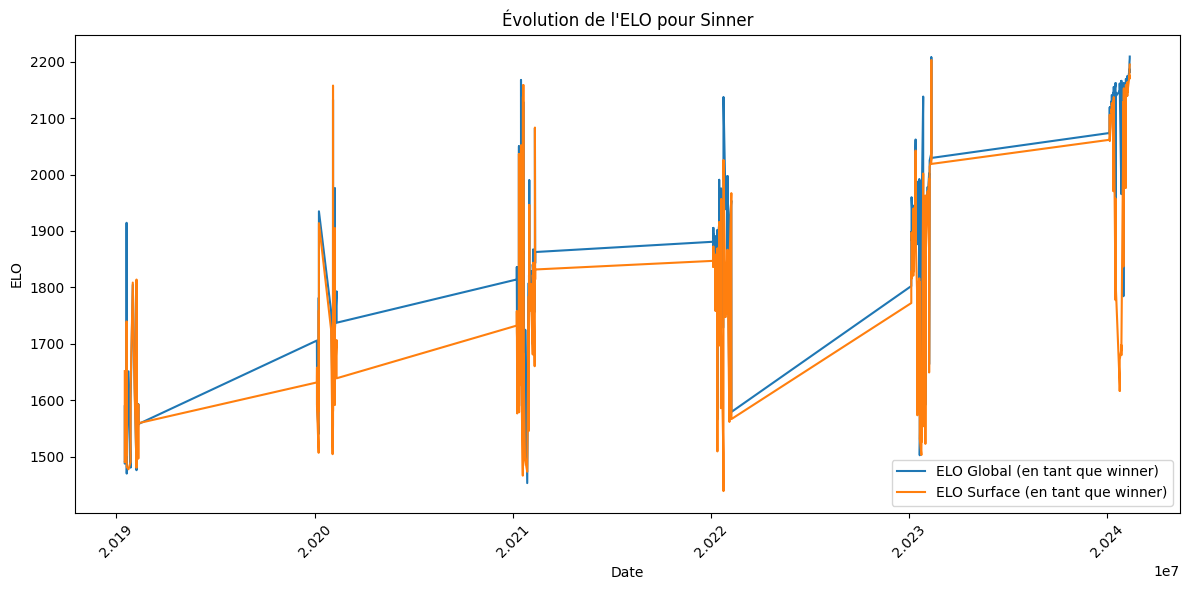

In [33]:
import matplotlib.pyplot as plt

# Exemple pour Sinner
player_name = 'Sinner'
player_df = df[df['winner_name'].str.contains(player_name, case=False) | df['loser_name'].str.contains(player_name, case=False)]
player_df = player_df.sort_values(by='tourney_date')

plt.figure(figsize=(12, 6))
plt.plot(player_df['tourney_date'], player_df['WINNER_ELO_BEFORE'], label='ELO Global (en tant que winner)')
plt.plot(player_df['tourney_date'], player_df['WINNER_ELO_SURFACE_BEFORE'], label='ELO Surface (en tant que winner)')
plt.title(f"Évolution de l'ELO pour {player_name}")
plt.xlabel("Date")
plt.ylabel("ELO")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

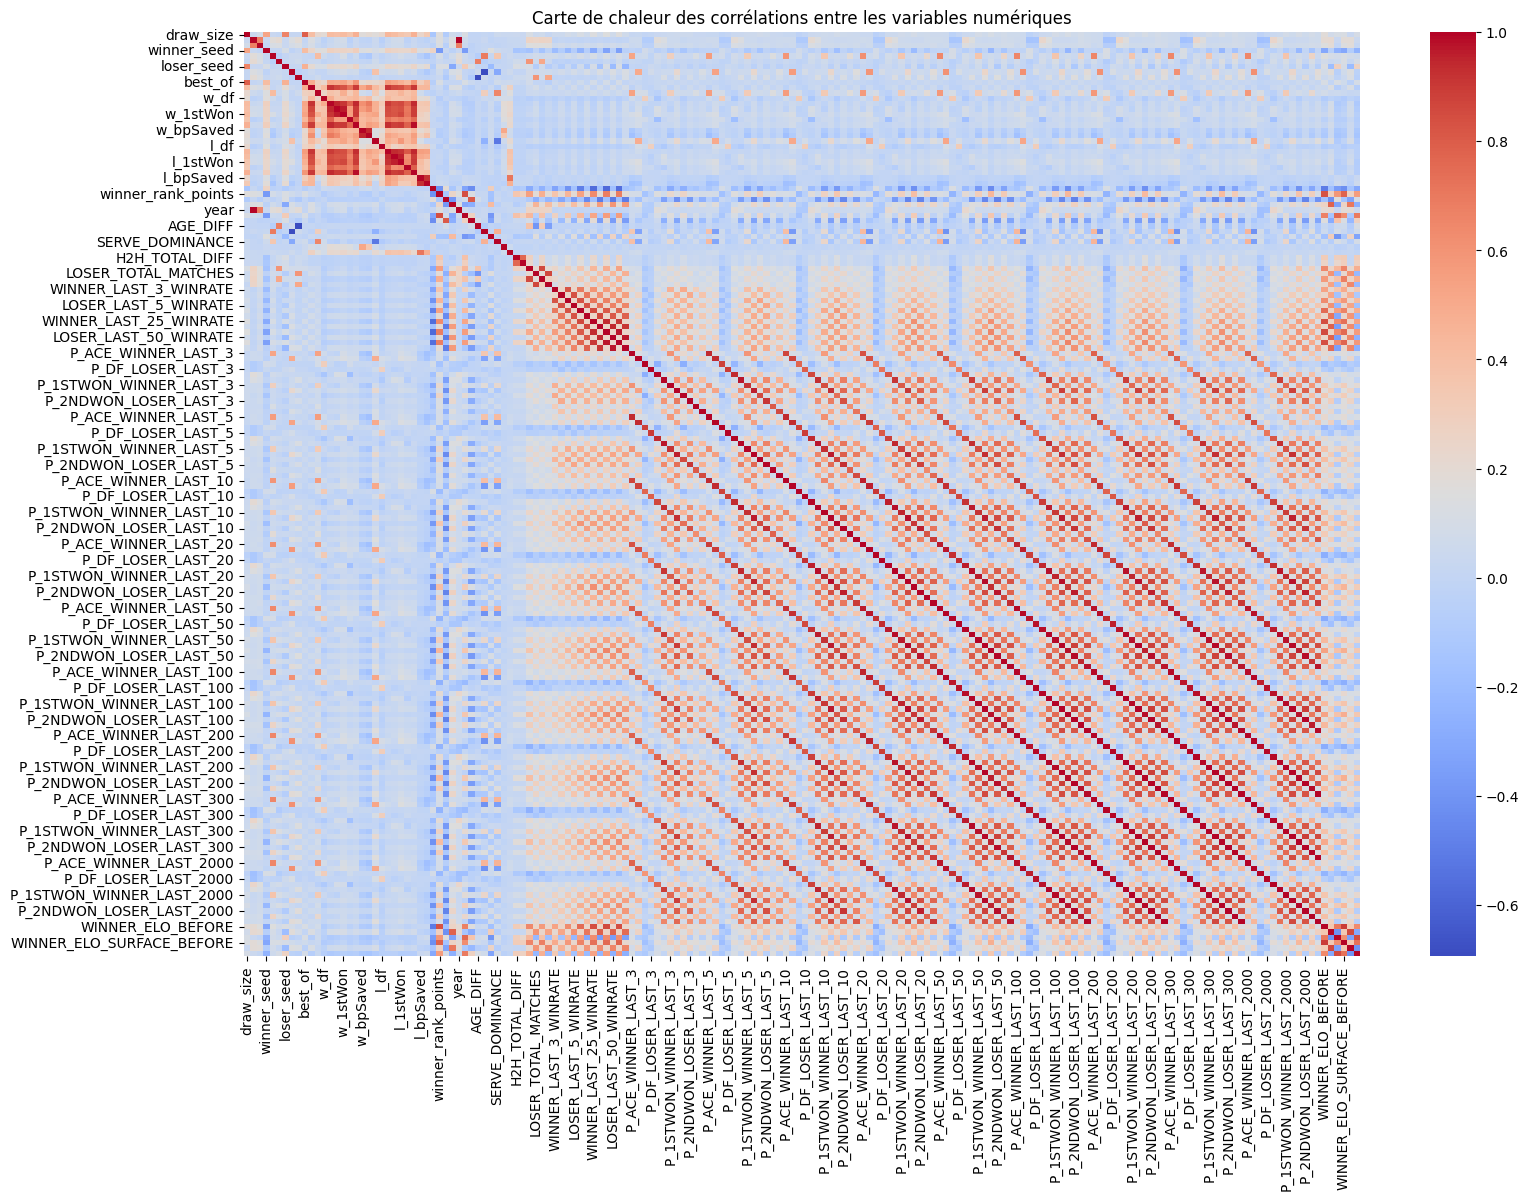

In [34]:
import seaborn as sns

# Garder que les colonnes numériques
numeric_cols = df.select_dtypes(include='number').drop(columns=['winner_id', 'loser_id']).copy()
corr = numeric_cols.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Carte de chaleur des corrélations entre les variables numériques")
plt.show()


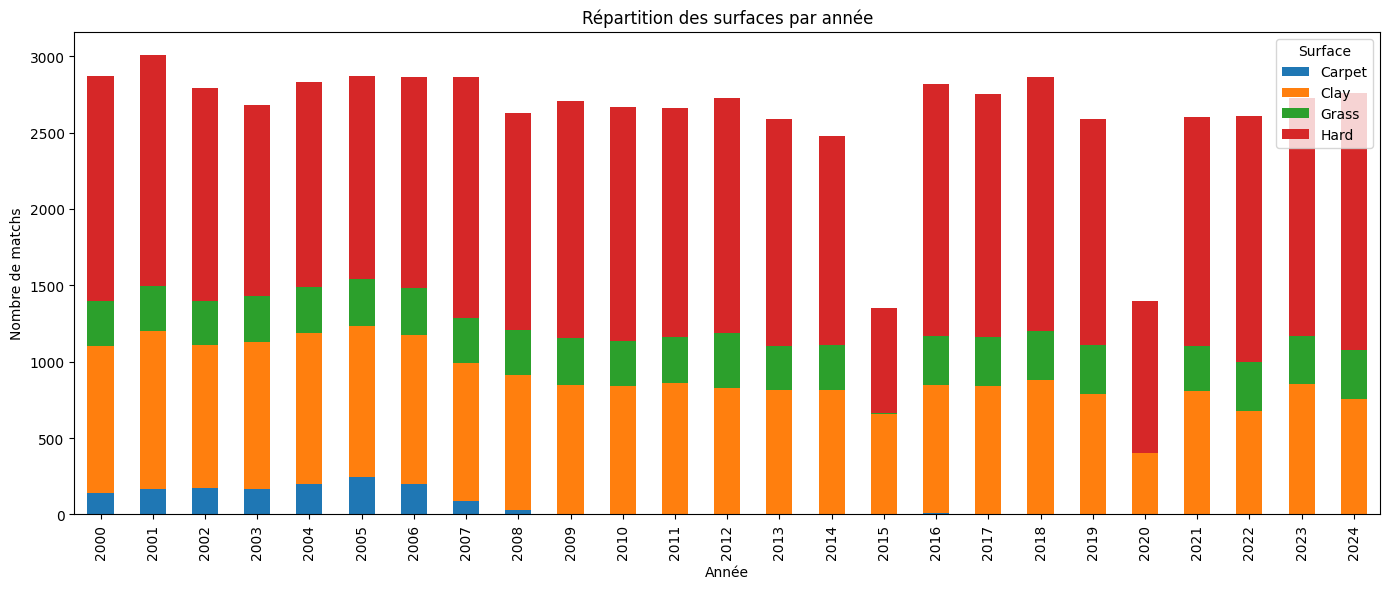

In [35]:
surface_by_year = df.groupby(['year', 'surface_raw']).size().unstack().fillna(0)

surface_by_year.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Répartition des surfaces par année")
plt.xlabel("Année")
plt.ylabel("Nombre de matchs")
plt.xticks(rotation=90)
plt.legend(title="Surface")
plt.tight_layout()
plt.show()

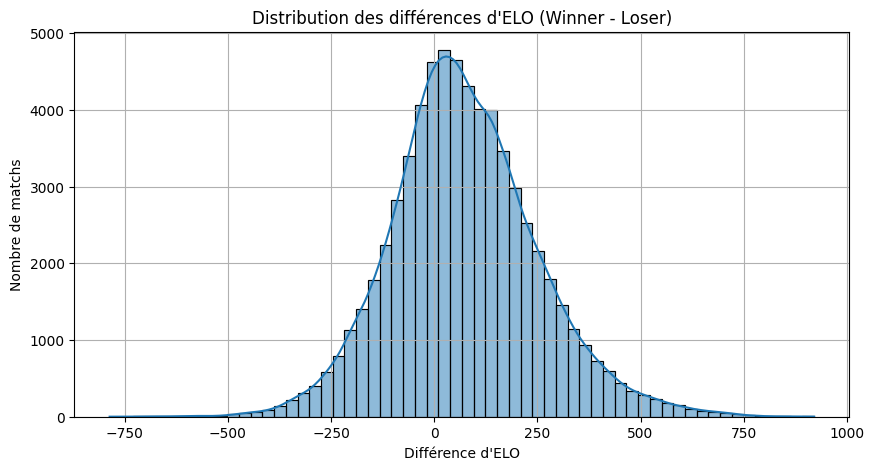

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ELO_DIFF'], kde=True, bins=60)
plt.title("Distribution des différences d'ELO (Winner - Loser)")
plt.xlabel("Différence d'ELO")
plt.ylabel("Nombre de matchs")
plt.grid(True)
plt.show()


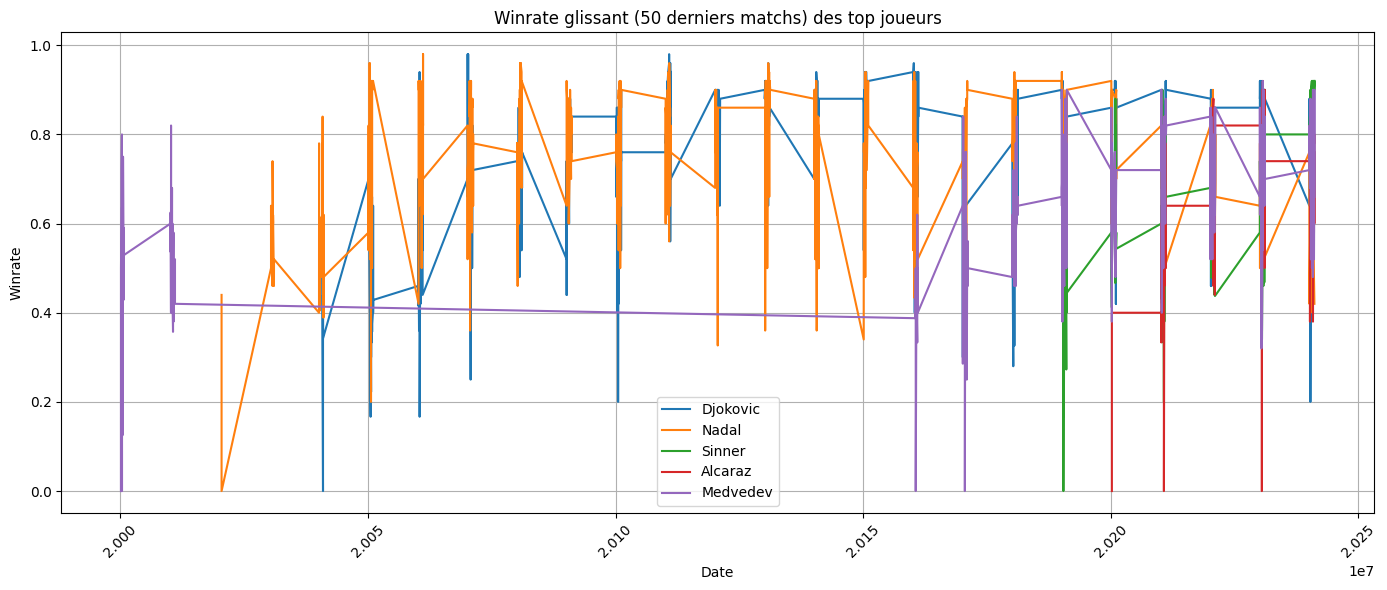

In [37]:
top_players = ['Djokovic', 'Nadal', 'Sinner', 'Alcaraz', 'Medvedev']
plt.figure(figsize=(14, 6))

for name in top_players:
    subset = df[df['winner_name'].str.contains(name, case=False) | df['loser_name'].str.contains(name, case=False)]
    subset = subset.sort_values(by='tourney_date')
    plt.plot(subset['tourney_date'], subset['WINNER_LAST_50_WINRATE'], label=name)

plt.title("Winrate glissant (50 derniers matchs) des top joueurs")
plt.xlabel("Date")
plt.ylabel("Winrate")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


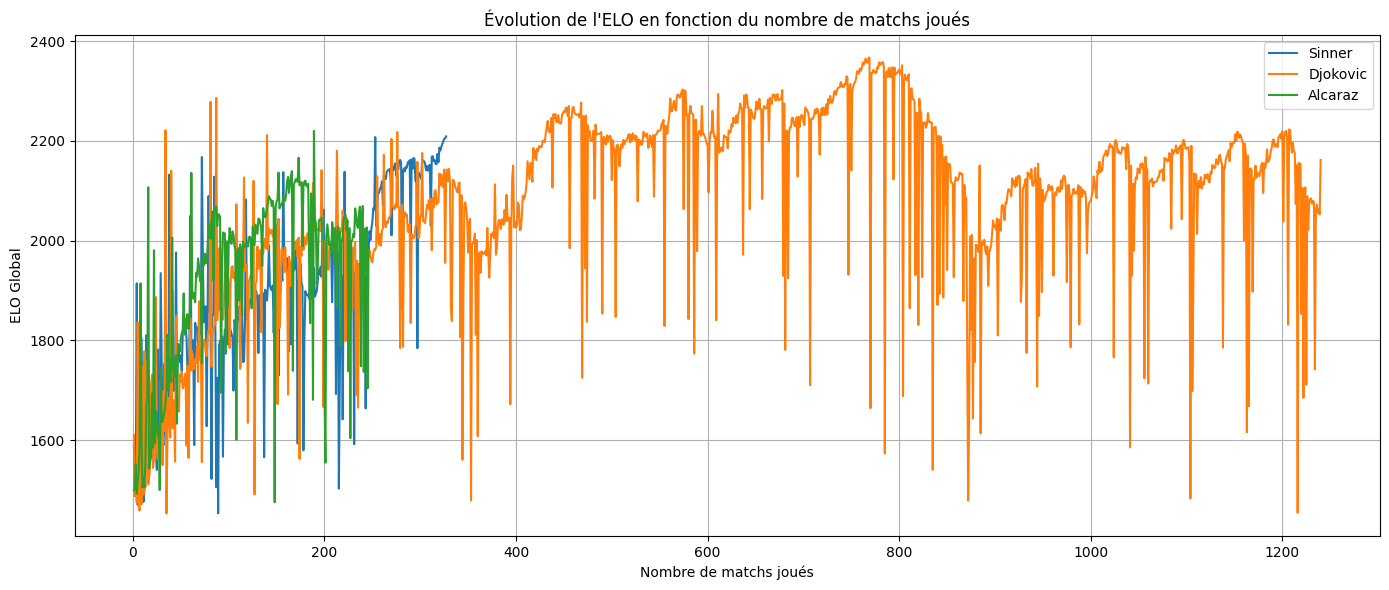

In [38]:
import matplotlib.pyplot as plt

# Choisir un ou plusieurs joueurs
players_to_plot = ['Sinner', 'Djokovic', 'Alcaraz']  # tu peux en ajouter autant que tu veux

plt.figure(figsize=(14, 6))

for name in players_to_plot:
    # Filtrer tous les matchs du joueur (winner ou loser)
    player_matches = df[(df['winner_name'].str.contains(name, case=False)) | 
                        (df['loser_name'].str.contains(name, case=False))].copy()
    
    # Trier par date pour simuler les matchs dans l'ordre chronologique
    player_matches = player_matches.sort_values(by='tourney_date').reset_index(drop=True)
    
    # Créer une colonne "match_count" (x-axis)
    player_matches['match_number'] = range(1, len(player_matches) + 1)
    
    # Tracer l'ELO global
    plt.plot(player_matches['match_number'], player_matches['WINNER_ELO_BEFORE'], label=name)

plt.title("Évolution de l'ELO en fonction du nombre de matchs joués")
plt.xlabel("Nombre de matchs joués")
plt.ylabel("ELO Global")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---